<h1>Predicts if a player will play golf based on weather condition using Decision Tree</h1>

In [0]:
from sklearn import tree
import pandas as pd
import pydotplus #decision tree plot
from IPython.display import Image

In [0]:
golf_df = pd.DataFrame()

#Outlook column
golf_df['Outlook'] = ['sunny','sunny','overcast','rainy',
                      'rainy','rainy','overcast','sunny',
                      'sunny','rainy','sunny','overcast',
                      'overcast','rainy']


#Temperature column
golf_df['Temperature'] = ['hot','hot','hot','mild',
                          'cool','cool','cool','mild',
                          'cool','mild','mild','mild',
                          'hot','mild']

#Humidity Column
golf_df['Humidity'] = ['high','high','high','high',
                       'normal','normal','normal','high',
                       'normal','normal','normal','high',
                       'normal','high']

#Windy Column
golf_df['Windy'] = ['false','true','false','false',
                    'false','true','true','false',
                    'false','false','true','true',
                    'false','true']

#Play Column (target variable)
golf_df['Play'] = ['no','no','yes','yes',
                   'yes','no','yes','no',
                   'yes','yes','yes','yes',
                   'yes','no']

In [15]:
golf_df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [14]:
#Convert categorical data into dummy/indicator variables (numbers that represent categories)

#Feature columns
one_hot_data = pd.get_dummies(golf_df[['Outlook','Temperature','Humidity','Windy']])

#1 True, 0 False
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [0]:
#Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

#Train the Decision Tree
#Feature columns, response/target column
clf_train = clf.fit(one_hot_data, golf_df['Play'])

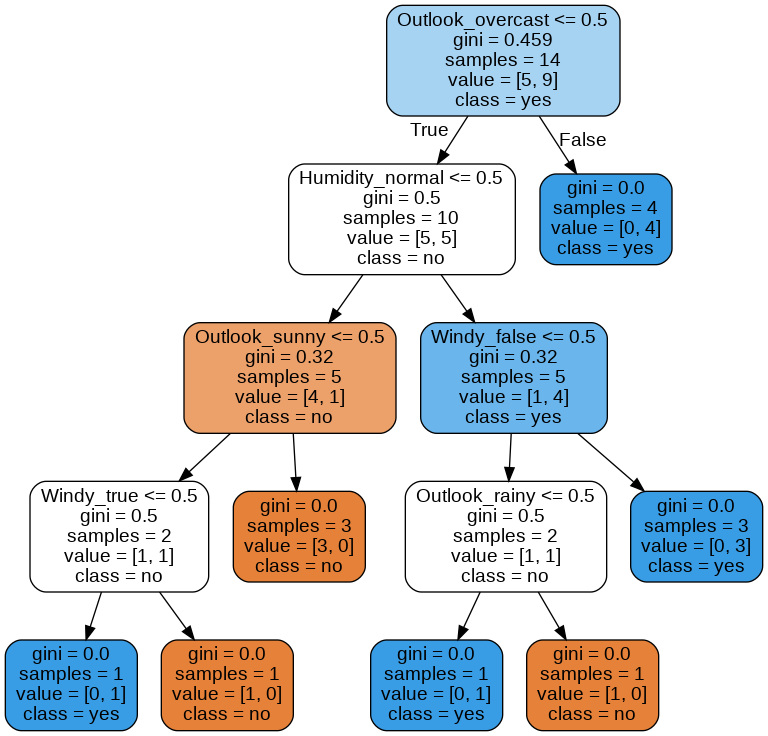

In [23]:
#Decision Tree in dot format
dot_data = tree.export_graphviz(clf_train,out_file=None, 
                                feature_names=list(one_hot_data.columns.values),
                                rounded=True, 
                                filled=True,
                                class_names=golf_df['Play'].unique())

dot_data

graph = pydotplus.graph_from_dot_data(dot_data)

#Show plot
Image(graph.create_png())

In [25]:
#Model Prediction
#Outlook = sunny, Temperature = hot, Humidity = normal, Windy = False
prediction = clf_train.predict([[0,0,1,0,1,0,0,1,1,0]])

prediction

array(['yes'], dtype=object)